<a href="https://colab.research.google.com/github/dfgrisales5078/Experiment-with-Topic-Models/blob/main/2_Experiment_with_Topic_Models_male.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid_data_path = '/content/drive/My Drive/COVIDSurveydata_incl_demographics filtered.csv'
covid_data = pd.read_csv(covid_data_path)

In [ ]:
covid_male = covid_data[covid_data['Sex'] == 'Male']

In [ ]:
covid_male.head(10)

#vectorize data for topic model - unigram


In [ ]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True,
                                   ngram_range = (1,1),
                                   max_df=0.95, min_df=2,   
                                   stop_words="english"
)

# Fit and Transform the documents
X = tfidf_vectorizer.fit_transform(covid_male['text_long'])
# get the actual words from the vectorized data
tf_feature_names = tfidf_vectorizer.get_feature_names_out()
print("n_samples: %d, n_features: %d" % X.shape)
# 2483 documents (rows), #4344 unique words (columns)

n_samples: 843, n_features: 2621


# perform LDA

In [ ]:
# Define the number of topics or components
# fill in the blanks, you can also checkout LDA in scikit-learn docs
num_components = 5 

# Create LDA object
ldamodel=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform model on data that has already been vectorized
lda_matrix = ldamodel.fit_transform(X)

# Get Components from the lda model
# components_[i, j] can be viewed as pseudocount that represents the number of
# times word j was assigned to topic i. from scikit learn 
lda_components=ldamodel.components_

In [ ]:
# view the topic models
n_top_words = 10 # how many words per topic

for i, topic in enumerate(lda_components):
    # numpy argsort: Returns the indices that would sort an array
    # we want the last n_top_words indices, as they have the highest counts 
    
    top_features_index = topic.argsort() [  :-n_top_words - 1 : -1 ]

    # based on indices, get the words, from the vectorizer features
    top_features = [tf_feature_names[i] for i in top_features_index]
    print('topic', i, top_features)

topic 0 ['afraid', 'people', 'worry', 'feel', 'situation', 'epidemic', 'family', 'work', 'virus', 'worried']
topic 1 ['people', 'feel', 'situation', 'worried', 'family', 'virus', 'time', 'home', 'government', 'anxious']
topic 2 ['feel', 'people', 'time', 'worried', 'going', 'family', 'health', 'virus', 'situation', 'anxious']
topic 3 ['feel', 'people', 'worried', 'things', 'situation', 'family', 'government', 'really', 'virus', 'life']
topic 4 ['people', 'feel', 'situation', 'time', 'home', 'virus', 'work', 'like', 'long', 'worried']


# plots of the topics and words

In [ ]:
# taken from 
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.6)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

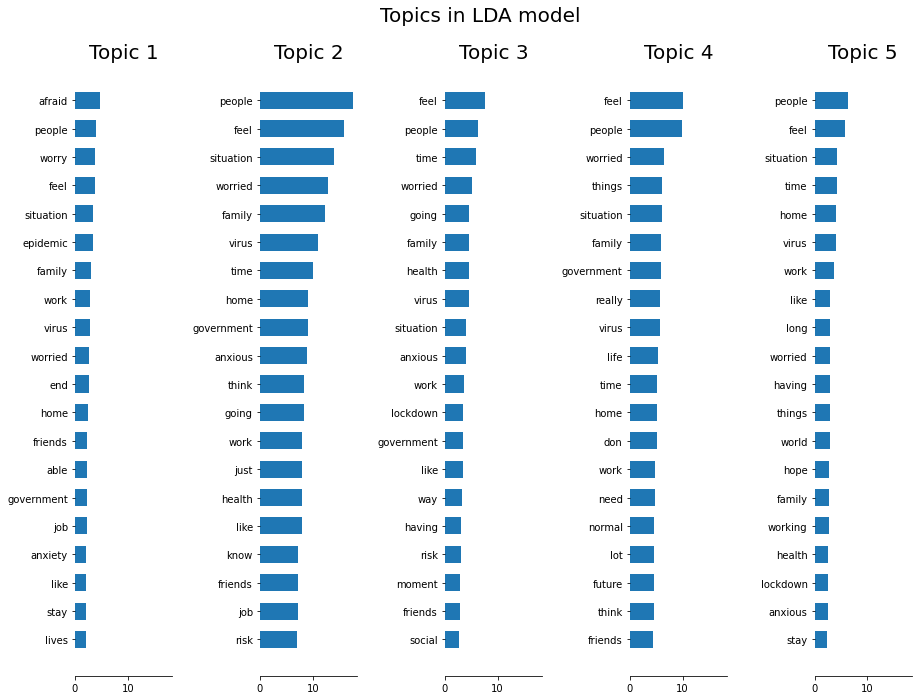

In [ ]:
import matplotlib.pyplot as plt
n_top_words = 20
plot_top_words(ldamodel, tf_feature_names, n_top_words, "Topics in LDA model")

#vectorize data for topic model - trigram


In [ ]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True,
                                   ngram_range = (3,3),
                                   max_df=0.95, min_df=2,   
                                   stop_words="english"
)

# Fit and Transform the documents
X = tfidf_vectorizer.fit_transform(covid_male['text_long'])
# get the actual words from the vectorized data
tf_feature_names = tfidf_vectorizer.get_feature_names_out()
print("n_samples: %d, n_features: %d" % X.shape)
# 2483 documents (rows), #4344 unique words (columns)

n_samples: 843, n_features: 646


# perform LDA

In [ ]:
# Define the number of topics or components
# fill in the blanks, you can also checkout LDA in scikit-learn docs
num_components = 5 

# Create LDA object
ldamodel=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform model on data that has already been vectorized
lda_matrix = ldamodel.fit_transform(X)

# Get Components from the lda model
# components_[i, j] can be viewed as pseudocount that represents the number of
# times word j was assigned to topic i. from scikit learn 
lda_components=ldamodel.components_

In [ ]:
# view the topic models
n_top_words = 10 # how many words per topic

for i, topic in enumerate(lda_components):
    # numpy argsort: Returns the indices that would sort an array
    # we want the last n_top_words indices, as they have the highest counts 
    
    top_features_index = topic.argsort() [  :-n_top_words - 1 : -1 ]

    # based on indices, get the words, from the vectorizer features
    top_features = [tf_feature_names[i] for i in top_features_index]
    print('topic', i, top_features)

topic 0 ['worry family friends', 'feel like government', 'worried corona situation', 'angry people listening', 'nhs key workers', 'long lasting effect', 'world look like', 'social media makes', 'feel slightly anxious', 'country world economy']
topic 1 ['high risk category', 'spend time family', 'light end tunnel', 'underlying health conditions', 'observing social distancing', 'mental physical health', 'key worker working', 'following lockdown rules', 'concerned elderly relatives', 'feel worried current']
topic 2 ['people taking seriously', 'feel like people', 'worried contracting virus', 'worried current situation', 'government handling situation', 'older generation family', 'number people dying', 'things taken granted', 'does make feel', 'feel little bit']
topic 3 ['social distancing measures', 'things return normal', 'social distancing rules', 'pre existing conditions', 'taking situation seriously', 'worried family getting', 'feel sorry people', 'people taking situation', 'long term 

# plots of the topics and words

In [ ]:
# taken from 
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.6)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

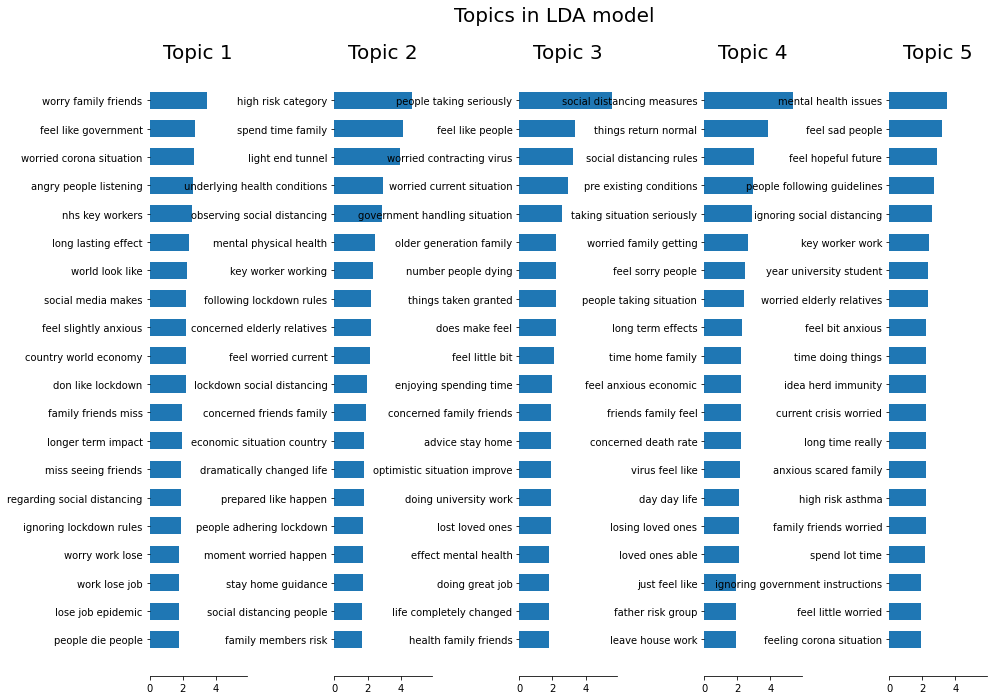

In [ ]:
import matplotlib.pyplot as plt
n_top_words = 20
plot_top_words(ldamodel, tf_feature_names, n_top_words, "Topics in LDA model")